In [1]:
import warnings

# Ignore UserWarning for QDA
warnings.simplefilter("ignore", UserWarning)

import os

dir = str(os.getcwd())
split_dir = dir.split('\\')

# Set the github repository directory
for folder in reversed(split_dir):
    if folder != 'AA_Project_G6' and 'AA_Project_G6' in split_dir:
        os.chdir(os.path.dirname(os.getcwd()))
    else:
        break

print('Current directory:', os.getcwd())

Current directory: C:\Users\joman


In [2]:
import pandas as pd
import numpy as np

# Import data from .csv file
df = pd.read_csv(filepath_or_buffer='./data/processed/data_processed.csv', delimiter=',')

FileNotFoundError: [Errno 2] No such file or directory: './data/processed/data_processed.csv'

There are 5 categorical features: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
There are 14 numerical features: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


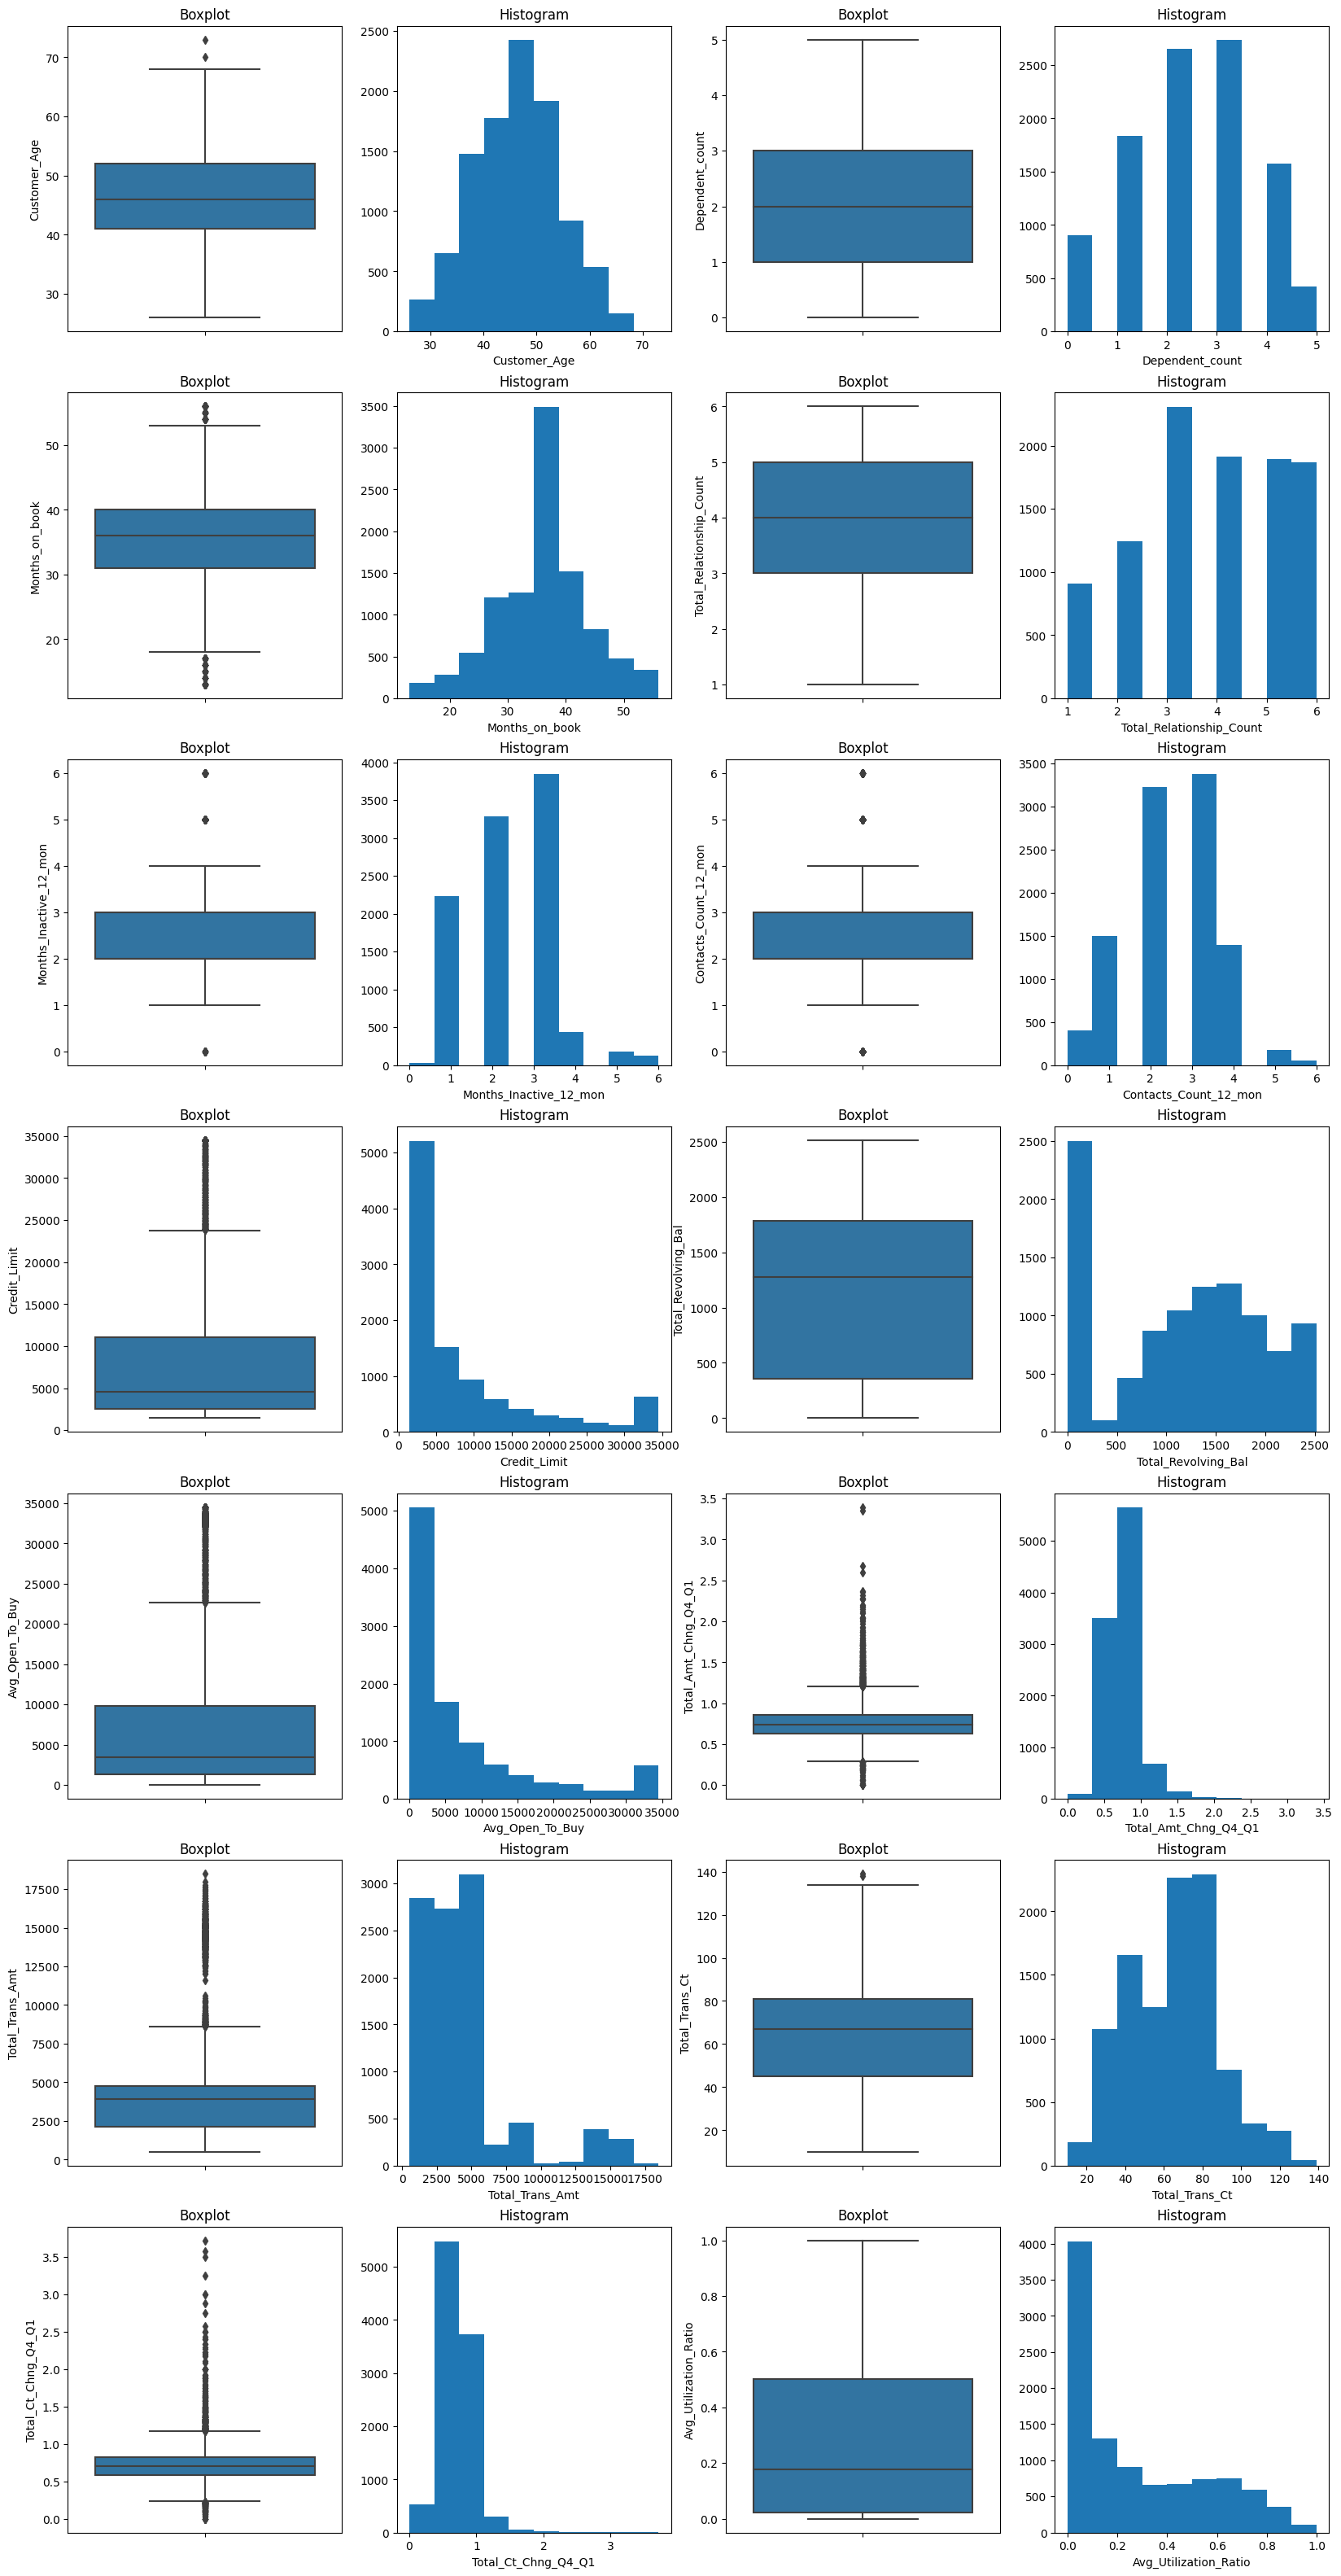

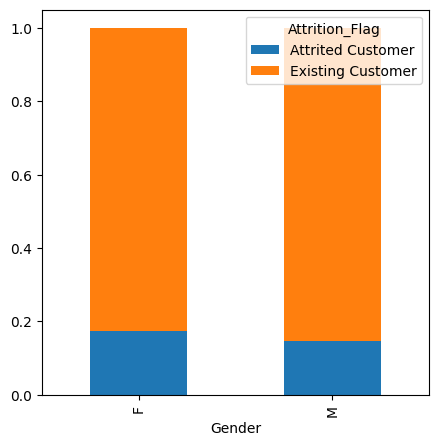

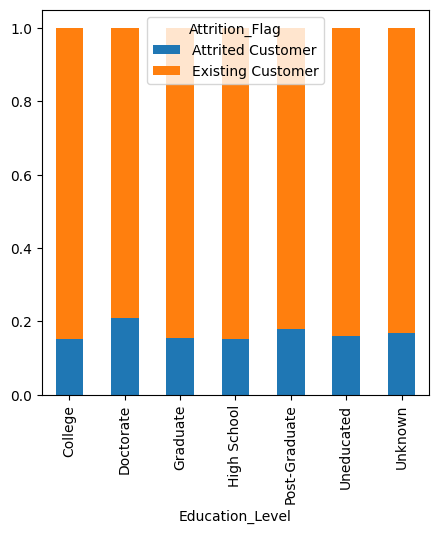

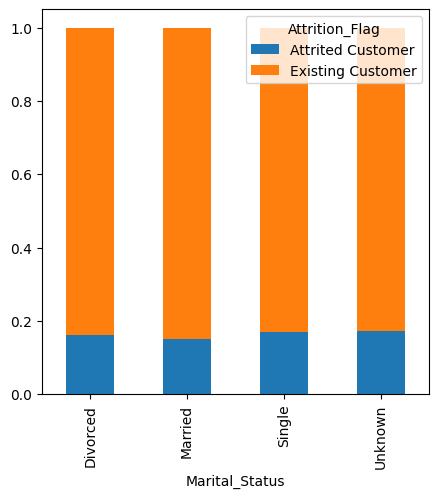

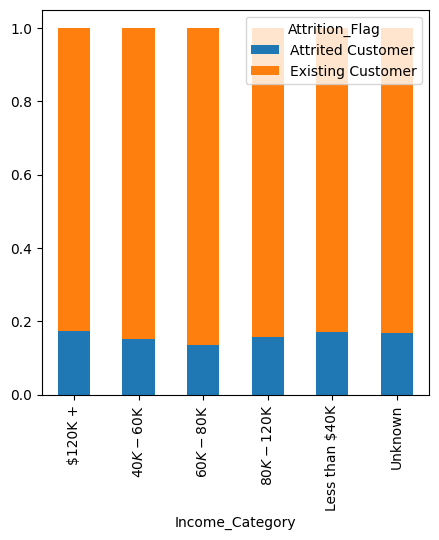

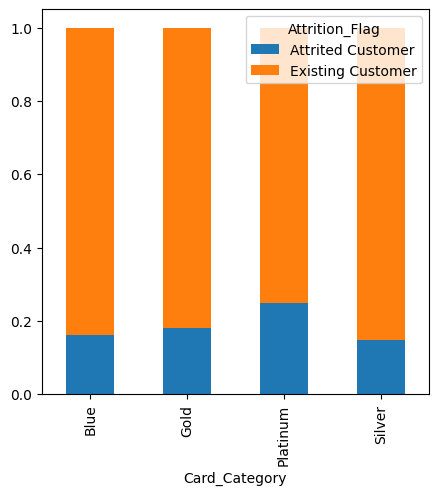

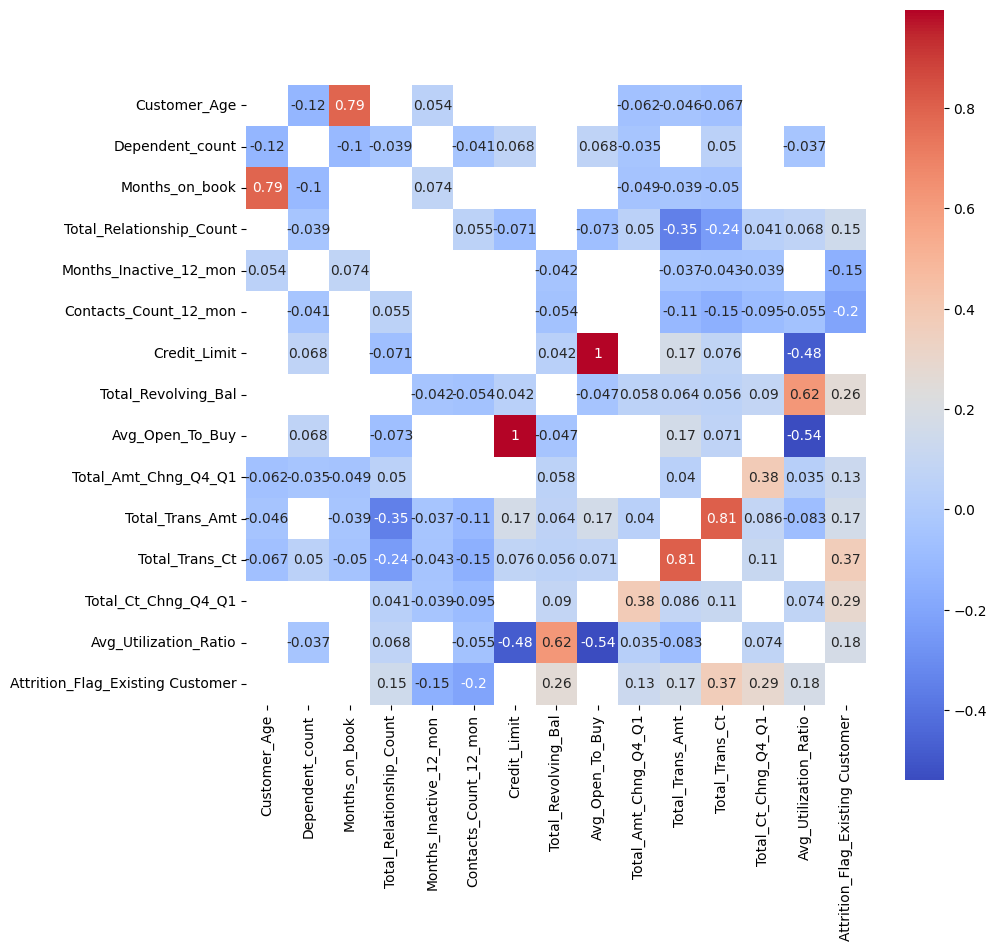

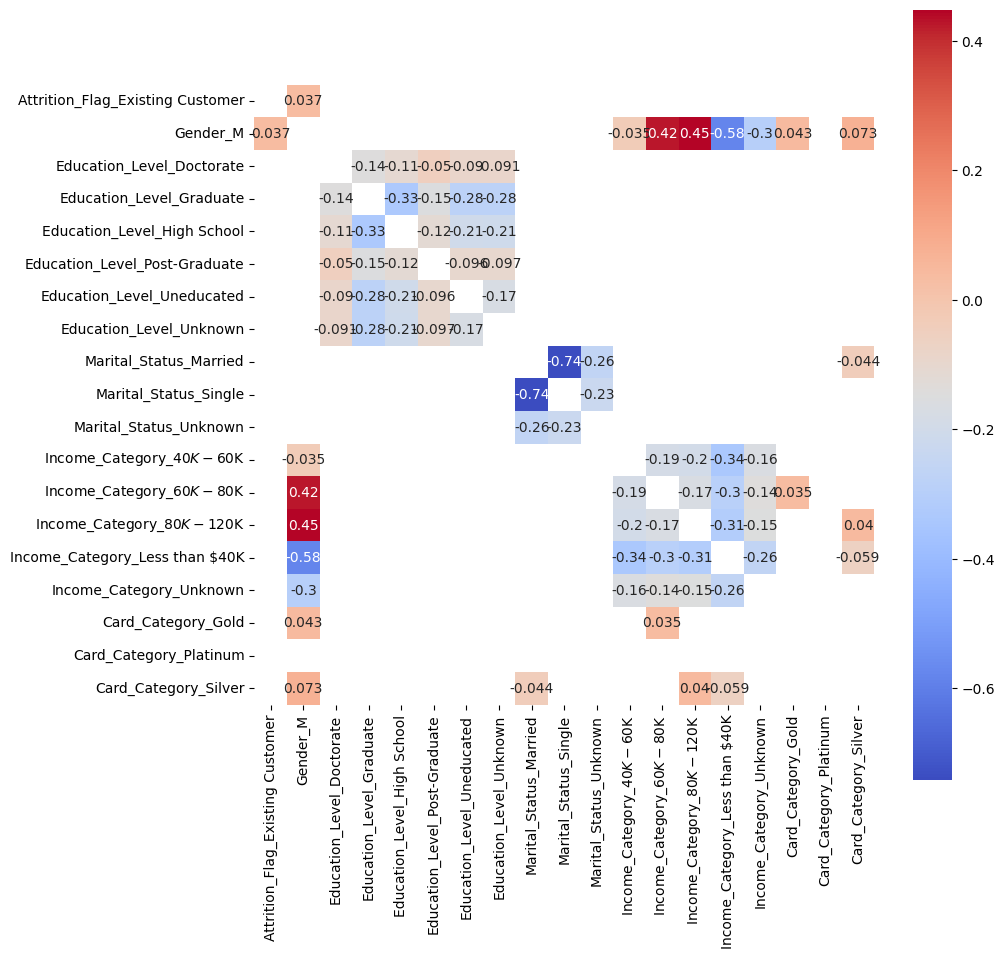

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_Existing Customer', 'Gender_M',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')


In [20]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import VarianceThreshold

# Create the input and output matrices, split in training and testing subsets
y = df.copy()['Attrition_Flag_Existing Customer']
X = df.copy().drop(columns=['Attrition_Flag_Existing Customer'])

##feature selection
X = X.drop(columns=['Avg_Open_To_Buy'])
X = X.drop(columns=['Total_Trans_Ct'])
#sel = VarianceThreshold(threshold=0.05) ##Does´t improve results
#X = sel.fit_transform(X)

##Generate test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

       Customer_Age  Dependent_count  Months_on_book  \
0                45                3              39   
1                49                5              44   
2                51                3              36   
3                40                4              34   
4                40                3              21   
...             ...              ...             ...   
10122            50                2              40   
10123            41                2              25   
10124            44                1              36   
10125            30                2              36   
10126            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5 

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

##Feature selection - Forward Selection
from sklearn.feature_selection import SequentialFeatureSelector

log_reg = LogisticRegression(max_iter=1000)
sfs = SequentialFeatureSelector(log_reg, n_features_to_select=4, direction='forward')
sfs.fit(X_train, y_train)
X_selection = sfs.transform(X_train)
#print("Selected Features: \n", X_selection)


## Predict the classification and print the confusion matrix
## Create the Logistic Regression model and fit the data to it
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_selection, y_train)

## Predict the classification and print the confusion matrix
X_test_selection = sfs.transform(X_test)
y_pred = log_reg.predict(X_test_selection)

print("Linear Regression Model using foward feature selection")
print ('\n' + 'Actual'.rjust(29))
print ('{} |  {}'.format('Churned'.rjust(24),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(15), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))


##No feature selection

## Create the Logistic Regression model and fit the data to it
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

## Predict the classification and print the confusion matrix
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('\n''\n'"Linear Regression Model without feature selection")
print ('\n' + 'Actual'.rjust(29))
print ('{} |  {}'.format('Churned'.rjust(24),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(15), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

## Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(log_reg.classes_)) if log_reg.classes_[i] == 'Up']
y_logistic_pred = log_reg.predict_proba(X_test)[:,cols_to_store]
y_logistic_true = (y_test.copy() == 'Up').copy()

Linear Regression Model using foward feature selection

                       Actual
                 Churned |  Existing
 Predicted Churned:  55 | 15
Predicted Existing:  120 | 822

Success Rate: 86.96%
Error Rate: 13.04%


Linear Regression Model without feature selection

                       Actual
                 Churned |  Existing
 Predicted Churned:  55 | 15
Predicted Existing:  120 | 822

Success Rate: 86.66%
Error Rate: 13.34%


C:\Users\joman\AppData\Local\Temp\ipykernel_27076\1332875061.py:54: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_logistic_true = (y_test.copy() == 'Up').copy()


AttributeError: 'bool' object has no attribute 'copy'

In [93]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

##Feature selection - Backward Selection
from sklearn.feature_selection import SequentialFeatureSelector

LDA = LinearDiscriminantAnalysis()
sfs = SequentialFeatureSelector(LDA, n_features_to_select=4, direction='backward')
sfs.fit(X_train, y_train)
X_selection = sfs.transform(X_train)
#print("Selected Features: \n", X_selection)


## Predict the classification and print the confusion matrix
## Create the Logistic Regression model and fit the data to it
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_selection, y_train)

## Predict the classification and print the confusion matrix
X_test_selection = sfs.transform(X_test)
y_pred = LDA.predict(X_test_selection)

print("Linear Discriminant Analysis Model using backward feature selection")
print ('\n' + 'Actual'.rjust(29))
print ('{} |  {}'.format('Churned'.rjust(24),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(15), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))


##No feature selection

# Create the Linear Discriminand Analysis model and fit the data to it
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

# Predict the classification and print the confusion matrix
y_pred = LDA.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('\n''\n'"Linear Discriminant Analysis Model without feature selection")
print ('\n' + 'Actual'.rjust(28))
print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))

# Print test error of the model
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(LDA.classes_)) if LDA.classes_[i] == 1]
y_LDA_pred = LDA.predict_proba(X_test)[:,cols_to_store]
y_LDA_true = (y_test.copy() == 1).copy()

Linear Discriminant Analysis Model using backward feature selection

                       Actual
                 Churned |  Existing
 Predicted Churned:  55 | 15
Predicted Existing:  120 | 822

Success Rate: 88.24%
Error Rate: 11.76%


Linear Discriminant Analysis Model without feature selection

                      Actual
                Churned  |  Existing
 Predicted Churned:  66 | 14
Predicted Existing:  109 | 823

Success Rate: 87.85%
Error Rate: 12.15%


In [94]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

##Feature selection - backward Selection
from sklearn.feature_selection import SequentialFeatureSelector

QDA = QuadraticDiscriminantAnalysis()
sfs = SequentialFeatureSelector(QDA, n_features_to_select=4, direction='backward')
sfs.fit(X_train, y_train)
X_selection = sfs.transform(X_train)
#print("Selected Features: \n", X_selection)


## Predict the classification and print the confusion matrix
## Create the Logistic Regression model and fit the data to it
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_selection, y_train)

## Predict the classification and print the confusion matrix
X_test_selection = sfs.transform(X_test)
y_pred = QDA.predict(X_test_selection)

print("Quadratic Discriminant Analysis Model using backward feature selection")
print ('\n' + 'Actual'.rjust(29))
print ('{} |  {}'.format('Churned'.rjust(24),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(15), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))



# Create the model and fit the data to it
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)

# Predict the classification and print the confusion matrix
y_pred = QDA.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('\n''\n'"Quadratic Discriminant Analysis Model without feature selection")
print ('\n' + 'Actual'.rjust(29))
print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))

# Print test error of the model
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(QDA.classes_)) if QDA.classes_[i] == 1]
y_QDA_pred = QDA.predict_proba(X_test)[:,cols_to_store]
y_QDA_true = (y_test.copy() == 1).copy()

Quadratic Discriminant Analysis Model using backward feature selection

                       Actual
                 Churned |  Existing
 Predicted Churned:  66 | 14
Predicted Existing:  109 | 823

Success Rate: 86.86%
Error Rate: 13.14%


Quadratic Discriminant Analysis Model without feature selection

                       Actual
                Churned  |  Existing
 Predicted Churned:  78 | 50
Predicted Existing:  97 | 787

Success Rate: 85.47%
Error Rate: 14.53%


In [95]:
from sklearn.naive_bayes import GaussianNB


##Feature selection - backward Selection
from sklearn.feature_selection import SequentialFeatureSelector

GNB = GaussianNB()
sfs = SequentialFeatureSelector(GNB, n_features_to_select=4, direction='backward')
sfs.fit(X_train, y_train)
X_selection = sfs.transform(X_train)
#print("Selected Features: \n", X_selection)


## Predict the classification and print the confusion matrix
## Create the Logistic Regression model and fit the data to it
GNB = GaussianNB()
GNB.fit(X_selection, y_train)

## Predict the classification and print the confusion matrix
X_test_selection = sfs.transform(X_test)
y_pred = GNB.predict(X_test_selection)

print("GaussianNB Model using backward feature selection")
print ('\n' + 'Actual'.rjust(29))
print ('{} |  {}'.format('Churned'.rjust(24),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(15), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))



# Create the Gaussian Naive Bayes model and fit the data to it
GNB = GaussianNB()
GNB.fit(X_train, y_train)

# Predict the classification and print the confusion matrix
y_pred = GNB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('\n''\n'"GaussianNB Model without feature selection")
print ('\n' + 'Actual'.rjust(29))
print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))

# Print success rate
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(GNB.classes_)) if GNB.classes_[i] == 1]
y_GNB_pred = GNB.predict_proba(X_test)[:,cols_to_store]
y_GNB_true = (y_test.copy() == 1).copy()

GaussianNB Model using backward feature selection

                       Actual
                 Churned |  Existing
 Predicted Churned:  78 | 50
Predicted Existing:  97 | 787

Success Rate: 88.64%
Error Rate: 11.36%


GaussianNB Model without feature selection

                       Actual
                Churned  |  Existing
 Predicted Churned:  67 | 26
Predicted Existing:  108 | 811

Success Rate: 86.76%
Error Rate: 13.24%


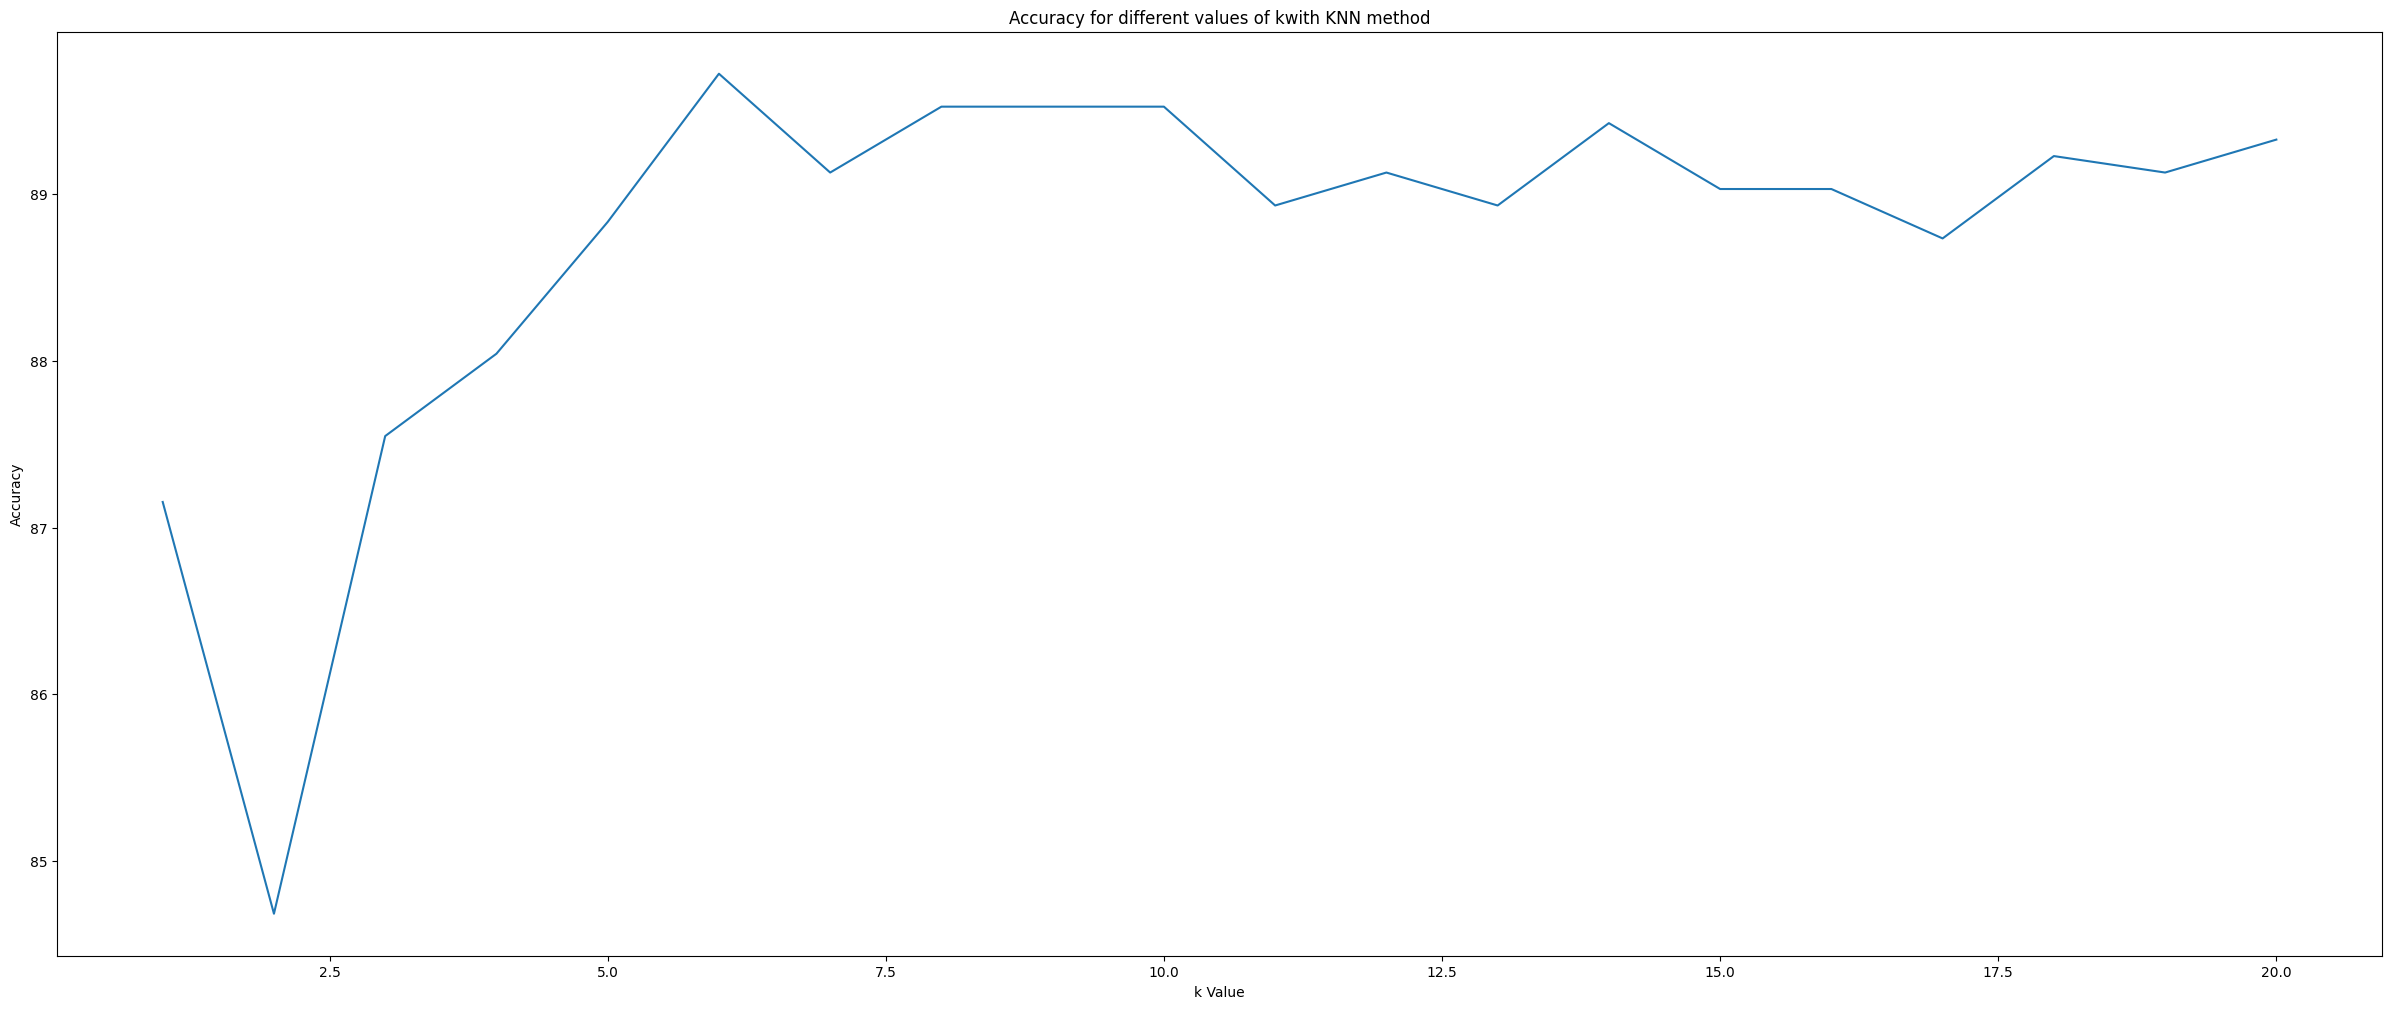


                       Actual
                Churned  |  Existing
 Predicted Churned:  121 | 50
Predicted Existing:  54 | 787

Success Rate: 89.72%
Error Rate: 10.28%


In [88]:
from sklearn.neighbors import KNeighborsClassifier

def KNN_fit(X_train, X_test, y_train, y_test, n_neighbors, verbosity=0):

    # Create the KNN model and fit the data to it
    KNN = KNeighborsClassifier(n_neighbors=n_neighbors)
    KNN.fit(X_train, y_train)

    # Predict the classification and print the confusion matrix
    y_pred = KNN.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy_val = accuracy_score(y_pred, y_test)*100
    
    if verbosity == 1:
        print ('\n' + 'Actual'.rjust(29))
        print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
        print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
        print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))
        # Print success rate
        print('\nSuccess Rate: {:.2f}%'.format(accuracy_val))
        print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))


    return KNN, accuracy_val

# Initialize a list to store the accuracies
accuracies = []
knn_limit = 20

# Access the custom created KNN function to calculate the accuracy for each number of neighbors
for i in range(knn_limit):
    _, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=i+1, verbosity=0)
    accuracies.append(accuracy_val)

# Plot the results
plt.subplots(figsize=(30, 12))
plt.plot([i+1 for i in range(knn_limit)], accuracies)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for different values of kwith KNN method')
plt.show()

# Find best K value for KNN model
max_accuracy = max(accuracies)
max_index = accuracies.index(max_accuracy)+1

# Store the necessary variables for ROC/AUC
KNN, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=max_index, verbosity=1)
cols_to_store = [i for i in range(len(KNN.classes_)) if KNN.classes_[i] == 1]
y_KNN_pred = KNN.predict_proba(X_test)[:,cols_to_store]
y_KNN_true = (y_test.copy() == 1).copy()

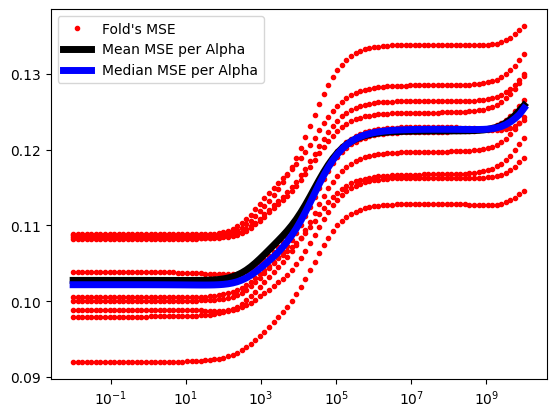

In [100]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

# K-Fold Cross Validation
random_seed = 10
kf = KFold(n_splits=10, random_state=random_seed, shuffle=True)

X_ridge = X.values
y_ridge = y.values

values_ridge = pd.DataFrame(columns=['alpha', 'mse'])
alphas = [10**i for i in np.linspace(start = -2, stop = 10, num = 100).tolist()]
count = 0
iter_count = 1

for alpha in alphas:

    for train, test in kf.split(X_ridge):

        X_train = X_ridge[train]
        X_test = X_ridge[test]
        y_train = y_ridge[train]
        y_test = y_ridge[test]
        
        clf = Ridge(alpha=alpha)
        clf.fit(X_train, y_train)


        y_pred = clf.predict(X_test)
        mse = metrics.mean_squared_error(y_pred,y_test)

        values_ridge.loc[count] = [alpha, mse]
        count += 1
        


values_ridge2 = values_ridge.copy()
values_ridge2 = values_ridge2.groupby("alpha").mean().reset_index()

values_ridge3 = values_ridge.copy()
values_ridge3 = values_ridge3.groupby("alpha").median().reset_index()

plt.plot(values_ridge.alpha, values_ridge.mse, 'r.', label = 'Fold\'s MSE')
plt.plot(values_ridge2.alpha, values_ridge2.mse, 'k', linewidth=5.0, label = 'Mean MSE per Alpha')
plt.plot(values_ridge3.alpha, values_ridge3.mse, 'b', linewidth=5.0, label = 'Median MSE per Alpha')
plt.xscale('log')
plt.legend()
plt.show()



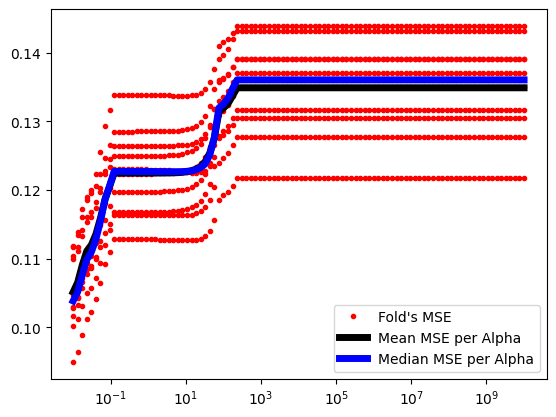


                       Actual
                Churned  |  Existing
 Predicted Churned:  0 | 0
Predicted Existing:  175 | 837

Success Rate: 82.71%
Error Rate: 17.29%


In [97]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

# K-Fold Cross Validation
random_seed = 10
kf = KFold(n_splits=10, random_state=random_seed, shuffle=True)

X_ridge = X.values
y_ridge = y.values

values_ridge = pd.DataFrame(columns=['alpha', 'mse'])
alphas = [10**i for i in np.linspace(start = -2, stop = 10, num = 100).tolist()]
count = 0
iter_count = 1

for alpha in alphas:

    for train, test in kf.split(X_ridge):
        
        X_train = X_ridge[train]
        X_test = X_ridge[test]
        y_train = y_ridge[train]
        y_test = y_ridge[test]

        clf = Lasso(alpha=alpha, max_iter = 20000)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        mse = metrics.mean_squared_error(y_pred,y_test)

        values_ridge.loc[count] = [alpha, mse]
        count += 1
        


values_ridge2 = values_ridge.copy()
values_ridge2 = values_ridge2.groupby("alpha").mean().reset_index()

values_ridge3 = values_ridge.copy()
values_ridge3 = values_ridge3.groupby("alpha").median().reset_index()


plt.plot(values_ridge.alpha, values_ridge.mse, 'r.', label = 'Fold\'s MSE')
plt.plot(values_ridge2.alpha, values_ridge2.mse, 'k', linewidth=5.0, label = 'Mean MSE per Alpha')
plt.plot(values_ridge3.alpha, values_ridge3.mse, 'b', linewidth=5.0, label = 'Median MSE per Alpha')
plt.xscale('log')
plt.legend()
plt.show()

##Confusion matrix
encoder = OneHotEncoder()
y_pred = encoder.fit_transform(y_pred.reshape(-1,1)).toarray()
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(29))
print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))

# Print success rate
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))